In [1]:
import pandas as pd
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, n_features=20, centers=15, cluster_std=2.0, shuffle=True, random_state=0)
variables = ['辛さ','重厚','スパイシー','果実味','コク','酸味','落ち着き','香り','華やか','ジューシー','熟成','透明感','シャープ','力強い',
             'フレッシュ','渋み','苦味','樽','エキゾチック','粘性']

name = list(map(str,[i for i in range(100)]))
df = pd.DataFrame(X, columns=variables,index=name)

In [2]:
df.head()

,辛さ,重厚,スパイシー,果実味,コク,酸味,落ち着き,香り,華やか,ジューシー,熟成,透明感,シャープ,力強い,フレッシュ,渋み,苦味,樽,エキゾチック,粘性
0,-6.867455,-5.634108,-0.881840,-6.482588,-7.159777,-6.394668,2.528458,-9.883541,7.197917,-7.291906,7.651226,1.407066,12.381189,2.889084,3.602466,-6.967406,-2.833069,-5.861254,-5.390123,-13.294555
1,8.591997,-2.939312,-2.795689,8.441495,8.202073,5.035962,-9.551829,11.863202,1.391670,6.811569,-5.089919,7.814202,-7.849138,0.114050,-2.882001,7.194346,7.214782,2.017785,-0.986718,-7.536471
2,0.246883,4.617195,3.212311,1.596973,-3.055192,0.042299,1.480808,6.456562,7.968668,-3.373548,2.148362,-0.378050,0.401580,9.752649,-7.182365,-8.249872,-7.731935,7.332327,5.531771,7.722099
3,5.007082,2.136003,11.041768,2.046806,-2.076545,4.375675,-9.963064,-4.988563,5.988508,-2.123277,2.397892,-2.612181,-11.314279,-2.854946,-0.393441,-2.108009,4.656146,4.359952,0.764049,-3.800434
4,-4.010045,4.244966,6.905713,-5.643761,6.686582,0.799046,-0.418340,2.750262,0.286303,-1.123998,-2.514172,-6.296712,-8.434826,8.658997,4.817495,-0.434714,-4.773589,-6.092134,-10.631048,-0.215011


name   , 

In [3]:
X.shape

(100, 20)

In [4]:
y.shape

(100,)

In [5]:
%matplotlib.inline
import matplotlib.pyplot as plt

ERROR:root:Line magic function `%matplotlib.inline` not found.


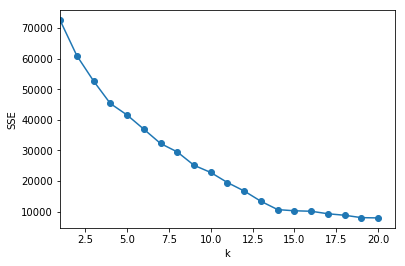

In [6]:
from sklearn.cluster import KMeans

SSE = []
for i in range(1, 21):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(X)
    SSE.append(km.inertia_)

plt.plot(range(1,21), SSE, marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.xlim(1,21,1)
plt.show()

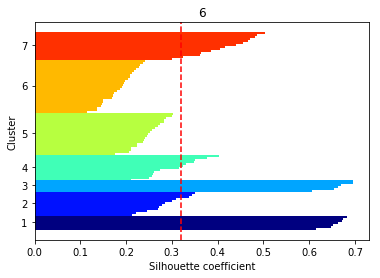

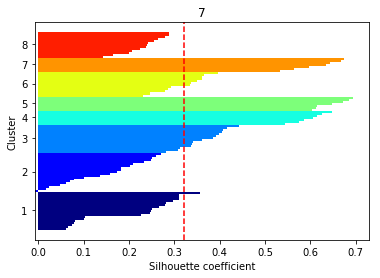

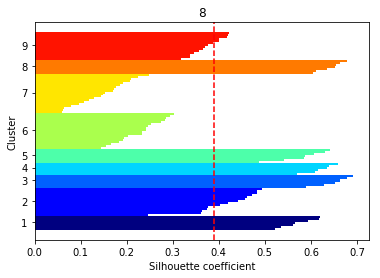

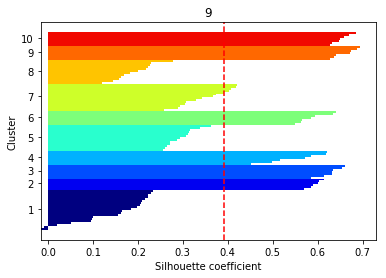

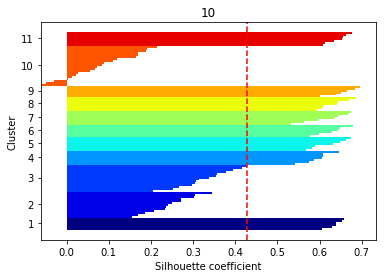

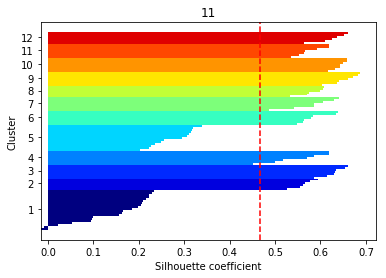

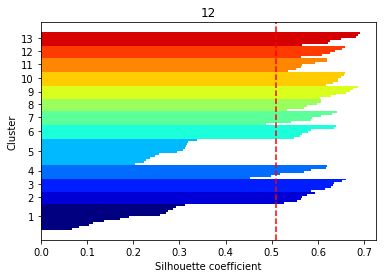

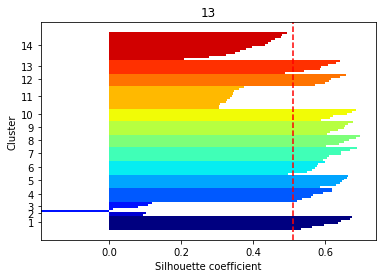

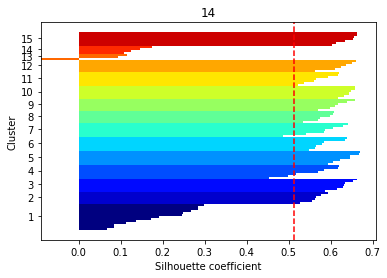

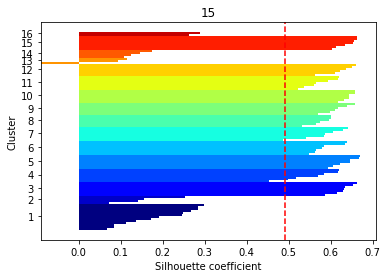

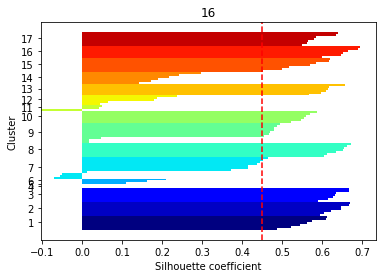

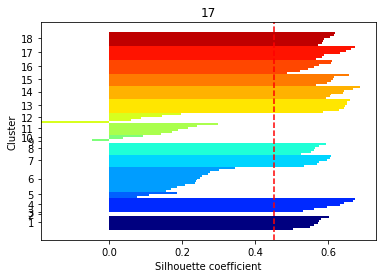

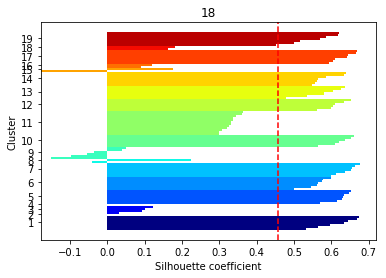

In [7]:
clusters = [7,8,9,10,11,12,13,14,15,16,17,18,19]

for i in clusters:

    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(X)
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples
    import numpy as np
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, cluster_labels + 1)
    plt.title(i)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.show()

In [14]:
df.head()

,辛さ,重厚,スパイシー,果実味,コク,酸味,落ち着き,香り,華やか,ジューシー,熟成,透明感,シャープ,力強い,フレッシュ,渋み,苦味,樽,エキゾチック,粘性
0,-6.867455,-5.634108,-0.881840,-6.482588,-7.159777,-6.394668,2.528458,-9.883541,7.197917,-7.291906,7.651226,1.407066,12.381189,2.889084,3.602466,-6.967406,-2.833069,-5.861254,-5.390123,-13.294555
1,8.591997,-2.939312,-2.795689,8.441495,8.202073,5.035962,-9.551829,11.863202,1.391670,6.811569,-5.089919,7.814202,-7.849138,0.114050,-2.882001,7.194346,7.214782,2.017785,-0.986718,-7.536471
2,0.246883,4.617195,3.212311,1.596973,-3.055192,0.042299,1.480808,6.456562,7.968668,-3.373548,2.148362,-0.378050,0.401580,9.752649,-7.182365,-8.249872,-7.731935,7.332327,5.531771,7.722099
3,5.007082,2.136003,11.041768,2.046806,-2.076545,4.375675,-9.963064,-4.988563,5.988508,-2.123277,2.397892,-2.612181,-11.314279,-2.854946,-0.393441,-2.108009,4.656146,4.359952,0.764049,-3.800434
4,-4.010045,4.244966,6.905713,-5.643761,6.686582,0.799046,-0.418340,2.750262,0.286303,-1.123998,-2.514172,-6.296712,-8.434826,8.658997,4.817495,-0.434714,-4.773589,-6.092134,-10.631048,-0.215011


### サンプル間の距離を求める

In [9]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),columns=name, index=name)
print(row_dist)

            0          1          2          3          4          5  \
0    0.000000  52.624242  41.002106  41.625637  39.249034  47.701933   
1   52.624242   0.000000  41.518133  32.704102  38.814321  30.022858   
2   41.002106  41.518133   0.000000  32.868977  33.399859  27.233159   
3   41.625637  32.704102  32.868977   0.000000  31.392470  33.169500   
4   39.249034  38.814321  33.399859  31.392470   0.000000  43.270015   
5   47.701933  30.022858  27.233159  33.169500  43.270015   0.000000   
6   32.179620  42.322500  42.507352  33.098625  34.126482  41.115787   
7   49.747503  34.028919  41.581994  42.137292  42.763238  35.980141   
8   49.666381  36.617068  41.808531  25.761110  39.462839  43.620806   
9   35.879622  43.626511  39.744987  38.883694  40.779959  39.486565   
10  50.838865  31.601004  26.357573  32.980938  41.791916  10.787777   
11  47.315310  33.713137  39.040665  34.561621  44.266361  30.931352   
12  47.588165  31.706927  25.667231  32.767814  41.475880  12.23

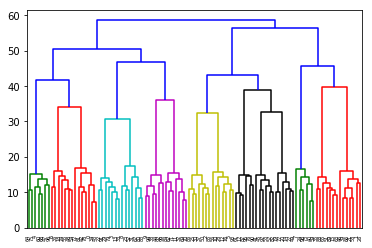

In [10]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
row_dender = dendrogram(row_clusters, labels=name)
plt.show()

### エルボー法とシルエット分析と樹状図（dendrogram）を駆使して得られた結果によると15種類のワインを置くのが良いかと思われる。   
__その理由としては樹状図を書いた時に縦軸２０の手前で図を切ると１５のまとまりに分けられているからであり、ホールド法で言えば１５でほぼ横ばいになっているしまた、シルエット法で言えば１５の図がクラスタの形と'Silhouette coefficient'の値から全体的にバランスの取れた分け方であると言えるので。__  
____

In [11]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=7,init='k-means++',n_init=10,max_iter=300,random_state=0)
y_km = km.fit_predict(X)

In [12]:
y_km

array([0, 2, 4, 5, 4, 3, 0, 2, 5, 0, 3, 3, 3, 5, 6, 1, 3, 1, 0, 6, 6, 2, 5,
       5, 2, 4, 2, 6, 3, 5, 4, 5, 3, 5, 0, 1, 0, 4, 0, 2, 2, 6, 0, 0, 0, 6,
       2, 4, 0, 6, 4, 1, 5, 6, 0, 0, 3, 6, 2, 2, 4, 1, 3, 1, 4, 1, 2, 5, 4,
       3, 3, 3, 0, 2, 0, 4, 1, 6, 0, 5, 5, 0, 6, 5, 3, 4, 4, 1, 1, 1, 1, 5,
       0, 3, 0, 1, 4, 6, 2, 0], dtype=int32)

In [13]:
y

array([ 3,  7,  0,  6,  9,  1,  2, 13,  8, 12,  1,  5,  1,  6, 10,  4,  1,
       11,  2, 10, 10,  7,  6,  8, 13,  0,  7, 10,  1,  6,  0,  8,  5,  6,
        3,  4,  2,  0, 12,  7, 13, 14,  3,  3, 12, 14,  7,  9,  2, 10,  0,
        4,  8, 14,  2,  2,  1, 14,  7, 13,  9, 11,  5,  4,  9,  4,  7,  8,
        9,  5,  5,  5,  3, 13,  2,  9, 11, 10,  3,  6,  8,  3, 14,  8,  5,
        0,  0, 11,  4,  4, 11,  6, 12,  1, 12, 11,  9, 14, 13, 12])